#  **В этой работе мы будем рассматривать методы *Кластеризации* и *Классификации* данных на примере датасета Iris**

"**Кластеризация** проводится на основе алгоритмов *без учителя*, в то время как **Классификация** - *с учителем*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

**Пояснение:**
наш датасет представляет из себя таблицу с указанием длины/ширины чашелистников/лепестков цветков Ириски

> Всего 3 типа:
*   iris setosa (щетинистый)
*   iris versicolor (разноцветный)
*   iris virginica (виргинский)

* SepalLengthCm - длина чашелистника
* SepalWidthCm - ширина чашелистника
* PetalLengthCm - длина лепестков
* PetalWidthCm - ширина лепестков

In [ ]:
url = "https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv"  # Берем датасет с гитхаба (raw csv)
iris = pd.read_csv(url)
iris_source = iris.copy()
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.drop("Id", axis=1, inplace = True)  # удалим ненужный столбец ID
iris['Species'].unique()                 # посмотрим, какие типы цветков у нас указаны

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
synonyms = {'Iris-setosa': 'Щетинистый', 'Iris-versicolor': 'Разноцветный', 'Iris-virginica': 'Виргинский'}  # для будущего обращения к названиям цветов на русском языке
iris_source['Species_synonyms'] = iris_source['Species'].map(synonyms)
iris_source.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_synonyms
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Щетинистый
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Щетинистый
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Щетинистый
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Щетинистый
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Щетинистый


# Посмотрим, как выглядят наши данные на графике:

##  В качестве категориальных переменных будем сначала использовать длину и ширину чашелистника


*   Желтый - setosa (щетинистый)
*   Синий - versicolor (разноцветный)
*   Зелёный - virginica (виргинский)

*   petal, sepal - лепесток и чашелистик

<a name="source-iris-sepal"></a>

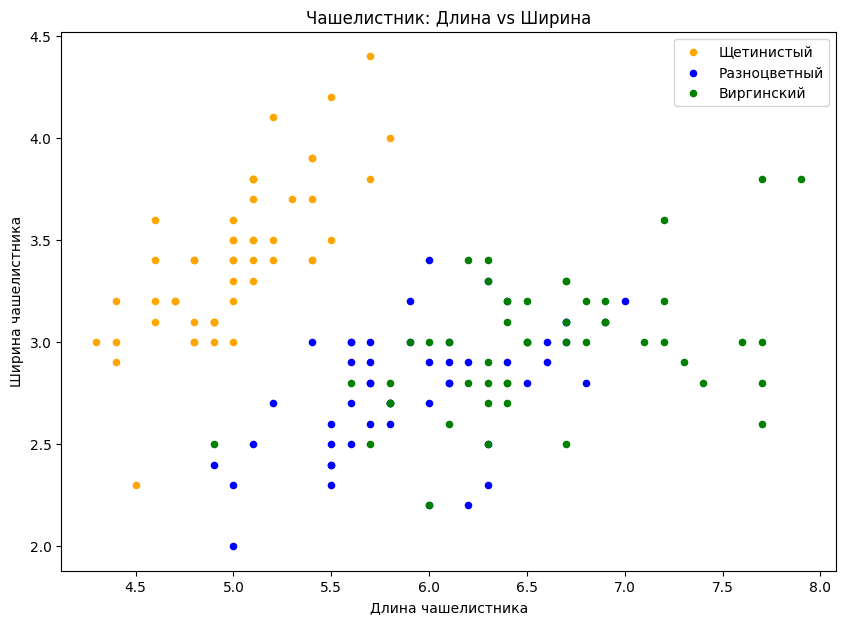

In [ ]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Щетинистый')           # setosa
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Разноцветный', ax=fig)     # versicolor
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Виргинский', ax=fig)       # virginica

fig.set_xlabel('Длина чашелистника')     # установим легенду
fig.set_ylabel('Ширина чашелистника')
fig.set_title('Чашелистник: Длина vs Ширина')

fig = plt.gcf()                    # получаем нашу текущую фигуру
fig.set_size_inches(10, 7)         # установим размеры
plt.show()

#### Если различие между **Щетинистыми** от остальных еще очевидно, то между **Разноцветным**и и **Виргинскими** трудно найти отличия

## Теперь посмотрим, как будут выглядеть наши характеристики цветков при параметрах лепестков


*   Желтый - setosa (щетинистый)
*   Синий - versicolor (разноцветный)
*   Зелёный - virginica (виргинский)

<a name="source-iris-petal"></a>

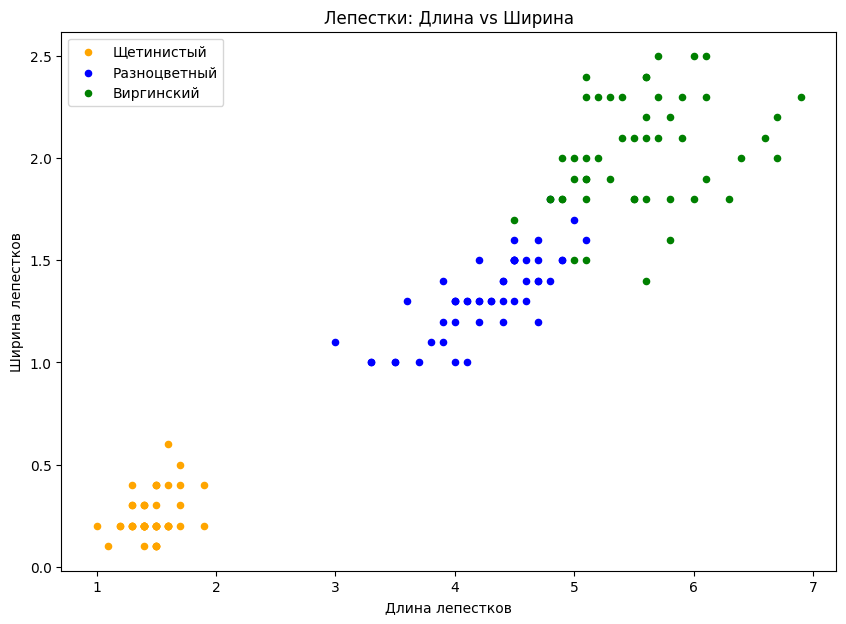

In [ ]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Щетинистый')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Разноцветный', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Виргинский', ax=fig)

fig.set_xlabel('Длина лепестков')
fig.set_ylabel('Ширина лепестков')
fig.set_title('Лепестки: Длина vs Ширина')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

#### На данном графике каждая группа имеет существенные отличия от друг друга

#### Можно посмотреть, как выглядят наши параметры на графиках "скрипки":



*   Желтый - setosa (щетинистый)
*   Синий - versicolor (разноцветный)
*   Зелёный - virginica (виргинский)


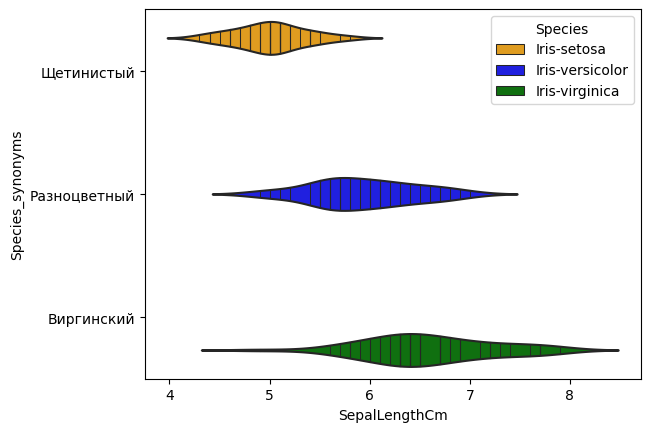

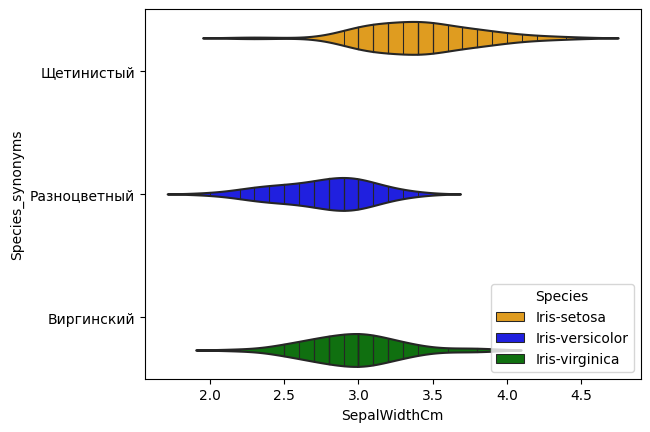

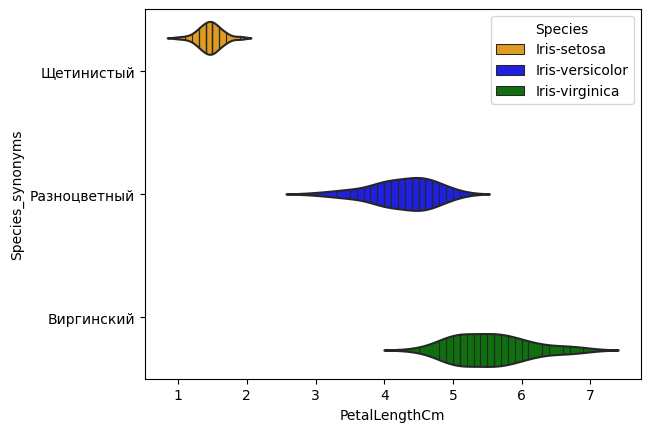

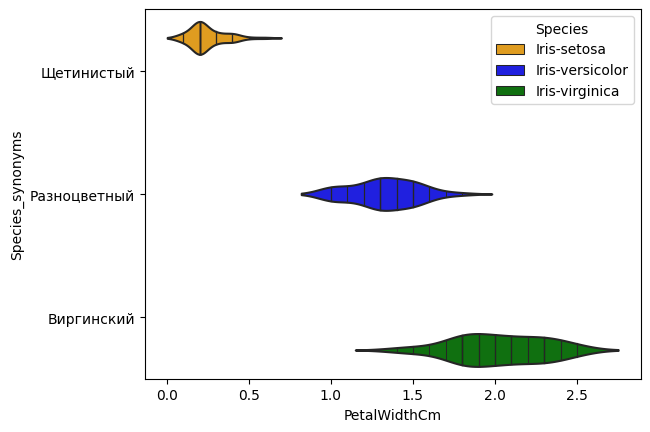

In [ ]:
sns.violinplot(x='SepalLengthCm', y='Species_synonyms', hue='Species', data=iris_source, inner='stick', palette=['orange', 'blue', 'green'])
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species_synonyms', hue='Species', data=iris_source, inner='stick', palette=['orange', 'blue', 'green'])
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species_synonyms', hue='Species', data=iris_source, inner='stick', palette=['orange', 'blue', 'green'])
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species_synonyms', hue='Species', data=iris_source, inner='stick', palette=['orange', 'blue', 'green'])
plt.show()

# Но что делать в условиях, когда наши цветки не имеют явного разделения на группы? Давайте удалим столбец "Species" и попробуем сами определить группы, на которые можно разделить наши данные

In [ ]:
iris.drop("Species", axis=1, inplace = True)  # удалим столбец Species
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Просто посмотрев на данные, невозможно определить, а вообще на **сколько** групп мы будем эти данные делить. Поэтому, сначала определим количество групп

### Для проведения кластеризации можно использовать одни из следующих методов:

* **KMeans** - используется для разделения больших наборов данных на более мелкие группы (кластеры) на основе их сходства. Алгоритм работает следующим образом:

      1. Выбирается количество кластеров, на которые нужно разбить данные.
      2. Инициализируются случайные центры кластеров.
      3. Каждый элемент данных относится к ближайшему центру кластера.
      4. Центры кластеров пересчитываются на основе новых кластеров, полученных на предыдущем шаге.
      5. Шаги 3 и 4 повторяются до тех пор, пока распределение элементов по кластерам перестанет меняться.



*    **Spectral Clustering** - это метод кластеризации, который основывается на спектральной теории графов. Этот метод позволяет кластеризовать данные, используя информацию о сходстве между точками данных и связях между ними в виде графа.

          1. Создание графа: из данных строится взвешенный граф, где каждая точка данных представлена вершиной,
          а ребра между вершинами имеют вес, отражающий степень сходства между точками.
          Часто используется метод k-ближайших соседей для определения сходства.

          2. Строится матрица смежности: на основе взвешенного графа строится матрица смежности,
          где элемент матрицы (i,j) соответствует весу ребра между вершинами i и j.

          3. Нормализация матрицы смежности: матрица смежности нормализуется для того,
          чтобы каждая строка матрицы соответствовала распределению вероятности.

          4. Вычисление собственных векторов: вычисляются первые k собственных векторов матрицы нормализованной матрицы смежности.

          5. Кластеризация: полученные собственные векторы используются для кластеризации данных
          с помощью методов кластеризации, таких как k-Means.

          6. Определение числа кластеров: число кластеров может быть определено на основе анализа спектра матрицы
          или методами, такими как индекс силуэта.


*    **OPTICS** (Ordering Points To Identify the Clustering Structure) - это алгоритм кластеризации, который определяет структуру кластеров на основе расстояний между объектами в пространстве данных. Он позволяет обнаруживать кластеры произвольной формы и учитывает шум в данных.

          1. Сначала выбирается случайная точка данных и на ее основе строится окрестность
          (выбираются все точки данных, которые находятся внутри заданного радиуса).

          2. На основе этой окрестности вычисляется минимальное расстояние (core-distance)
          до заданного количества ближайших соседей. Если окрестность содержит меньше точек данных,
          чем заданное количество соседей, то эта точка считается выбросом.

          3. Далее происходит построение кластеров на основе минимальных расстояний (core-distances) между точками данных.
          Точки с меньшим расстоянием объединяются в кластеры.

          4. OPTICS также строит диаграмму разветвления (reachability plot),
          которая отображает минимальные расстояния между точками данных в порядке увеличения.
          Диаграмма разветвления позволяет определить плотность и структуру кластеров, а также обнаружить выбросы.

          5. Наконец, можно выбрать пороговое значение расстояния, при котором точки считаются принадлежащими кластеру.
          Это значение определяет размер кластеров

          * OPTICS позволяет обнаруживать кластеры произвольной формы и плотности, а также обнаруживать выбросы.
          Однако, алгоритм может быть вычислительно сложным при работе с большими наборами данных.


*    **Алгоритм DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) используется для кластеризации данных на основе плотности точек в пространстве.

  1. Задать значения $\epsilon$ (радиус окрестности) и $MinPts$ (минимальное количество точек в окрестности), где $\epsilon$ и $MinPts$ - гиперпараметры алгоритма.

  2. Выбрать случайную неразмеченную точку и найти все точки в радиусе $\epsilon$ от неё (включая саму точку).

  3. Если количество точек в радиусе $\epsilon$ меньше $MinPts$, пометить эту точку как выброс (outlier) и перейти к следующей неразмеченной точке. Если количество точек больше или равно $MinPts$, продолжить на следующий шаг.

  4. Начиная с текущей точки, построить кластер путём добавления всех точек, которые могут быть достигнуты из неё (и которые сами являются корневыми точками)

  5. Пометить все точки кластера как размеченные и перейти к следующей неразмеченной точке.



## **KMeans**


### Для начала работы с KMeans, стоит определить наше количество групп. Делать мы будем это с помощью Графика Локтя.

##### График Локтя (Elbow Method) - метод, который используется для определения оптимального количества кластеров в алгоритме KMeans. Он основан на изменении суммы квадратов расстояний между центроидами кластеров и их соответствующими элементами данных при изменении числа кластеров.

График Локтя строится следующим образом:


    Запускается алгоритм KMeans с разным количеством кластеров (например, от 1 до 10).

    Для каждого количества кластеров вычисляется сумма квадратов расстояний между центроидами и элементами данных
    (так называемый "инерционный коэффициент").

    Эти значения отображаются на графике,
    где количество кластеров представлено по оси X, а значения инерционного коэффициента по оси Y.

    Изменение количества кластеров может приводить к резкому изменению значения инерционного коэффициента.
    На графике это может выглядеть как "локоть".

    Оптимальное количество кластеров определяется там,
    где дальнейшее увеличение числа кластеров уже не приводит к существенному уменьшению инерционного коэффициента.


In [ ]:
from sklearn.cluster import KMeans

X_temp = iris.to_numpy()

k_inertia = []        # создаем список для инерции
ks = range(1, 20)     # задаем диапазон кластеров

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_temp)
    k_inertia.append(clf_kmeans.inertia_)     # добавляем инерцию каждой модели в список

Text(0, 0.5, 'WCSS')

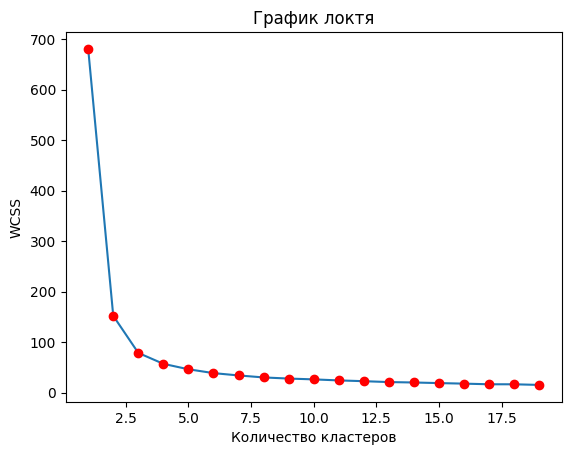

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.title('График локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')


    WCSS (within-cluster sum of squares) - метрика, которая используется для оценки качества кластеризации данных в методе главных компонент (PCA).

    Метод главных компонент - это метод снижения размерности данных, который позволяет представить данные в виде линейной комбинации их главных компонент
    (которые являются линейными комбинациями исходных признаков). Когда мы применяем PCA к данным с целью кластеризации,
    мы можем использовать WCSS для определения оптимального числа кластеров.

    WCSS - это сумма квадратов расстояний между каждым объектом и его центроидом внутри каждого кластера.
    Чем меньше WCSS, тем более плотно расположены объекты внутри кластера и тем лучше кластеризация данных.
    При увеличении числа кластеров WCSS обычно уменьшается, но при этом происходит уменьшение количества объектов в каждом кластере,
    что может привести к ухудшению качества кластеризации.
    
    Поэтому, чтобы определить оптимальное число кластеров в методе главных компонент,
    мы можем построить график WCSS в зависимости от количества кластеров и найти "локоть"
    (точку на графике, где изменение WCSS замедляется).
    Это число кластеров будет оптимальным для данного набора данных и поможет нам выбрать наиболее подходящее число кластеров для кластеризации методом главных компонент.

### По графику видно, что отличие при 2 кластерах наиболее различимо. При 3 уже отличий становится меньше. Посмотрим, как на графике будут выглядеть 2 кластера:

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_temp)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

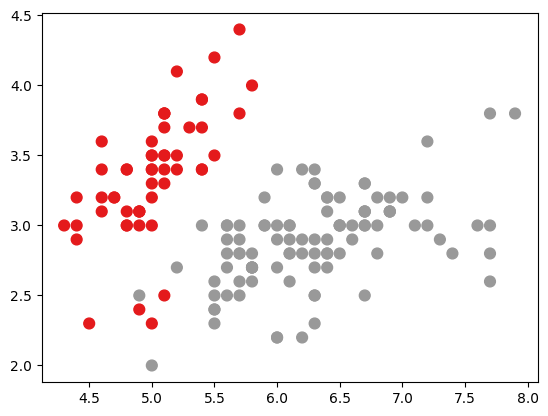

In [ ]:
plt.scatter(X_temp[:, 0], X_temp[:, 1], cmap='Set1', c=clusters, s=60)

#### На графике видно, что наши данные разделились на 2 группы: красные и серые.

### Но как же понять, что среди серых точек затесалось еще 2 подгруппы?

#### Помимо "**Графика Локтя**" можно использовать **Дендрограмму**

##### Дендрограмма - графическое представление результатов иерархической кластеризации. Она представляет собой древовидную структуру, где каждый узел представляет собой кластер, а расстояние между узлами отображает меру сходства между кластерами.

Дендрограмма строится следующим образом:

    Каждый элемент данных начинает как отдельный кластер.
    Вычисляется расстояние между каждой парой кластеров.
    Два ближайших кластера объединяются в новый кластер, а расстояние между этими кластерами становится высотой узла дендрограммы.
    Шаги 2 и 3 повторяются, пока все кластеры не будут объединены в один кластер.

На дендрограмме ось Y показывает расстояние между кластерами, а ось X отображает каждый элемент данных и его принадлежность к определенному кластеру. Чем выше расстояние на оси Y, тем менее похожи кластеры.

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

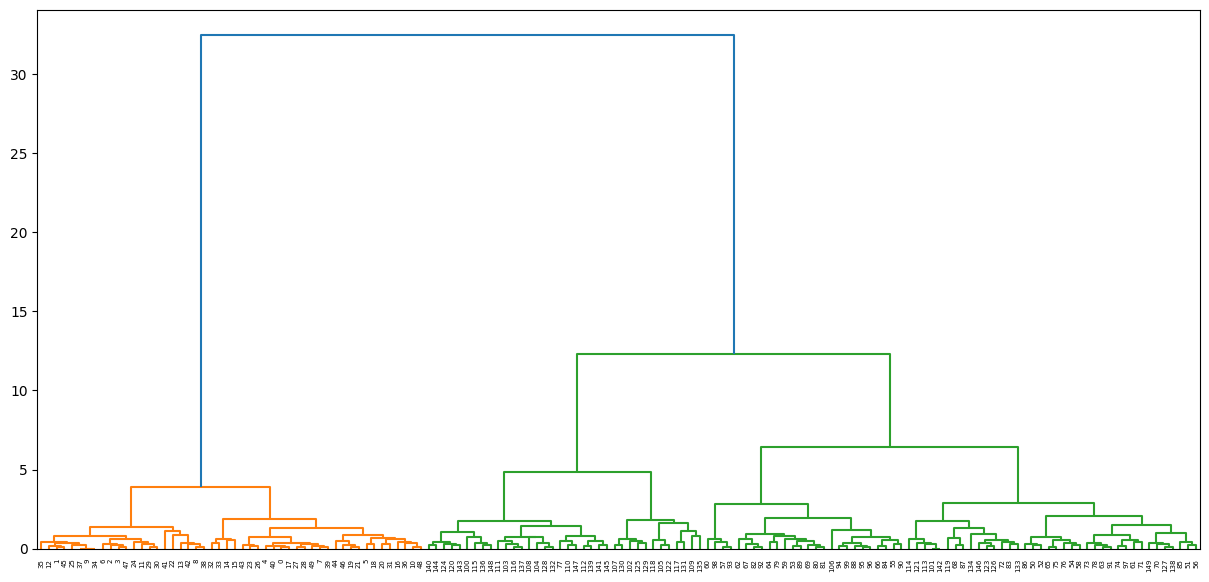

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_temp) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма (cringe)
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(15, 7))
dn = hierarchy.dendrogram(Z)

### Уже на этом графике видно, что в **Зелёном** узле находятся наши 2 подгруппы. Исходя из этого посмотрим наш график, разделив его на 3 кластера:

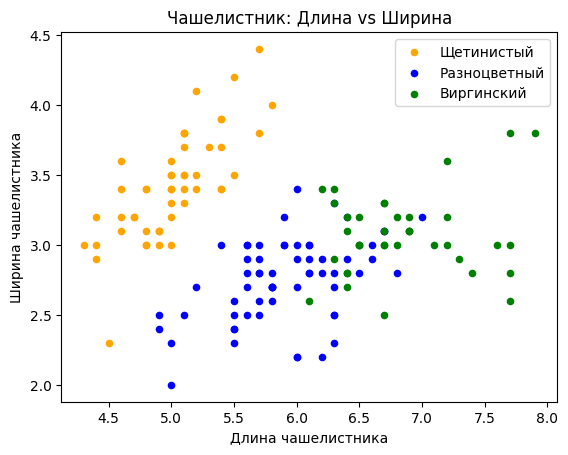

In [ ]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_temp)

iris['cluster'] = pd.Series(clusters, index=iris.index)

fig = iris[iris.cluster == 0].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Щетинистый')
iris[iris.cluster == 1].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Разноцветный', ax=fig)
iris[iris.cluster == 2].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Виргинский', ax=fig)

fig.set_xlabel('Длина чашелистника')
fig.set_ylabel('Ширина чашелистника')
fig.set_title('Чашелистник: Длина vs Ширина')

fig=plt.gcf()
plt.show()

### Для наглядности можно с родной классификацией **'Species'** [Вот тут](#source-iris-sepal)

#### Как можно увидеть, видны небольшие несоотвествия: **Виргинских** (зелёные) чуть больше **Разноцветных** (синие) в смоделированной нами модели

### **Spectral Clustering**:

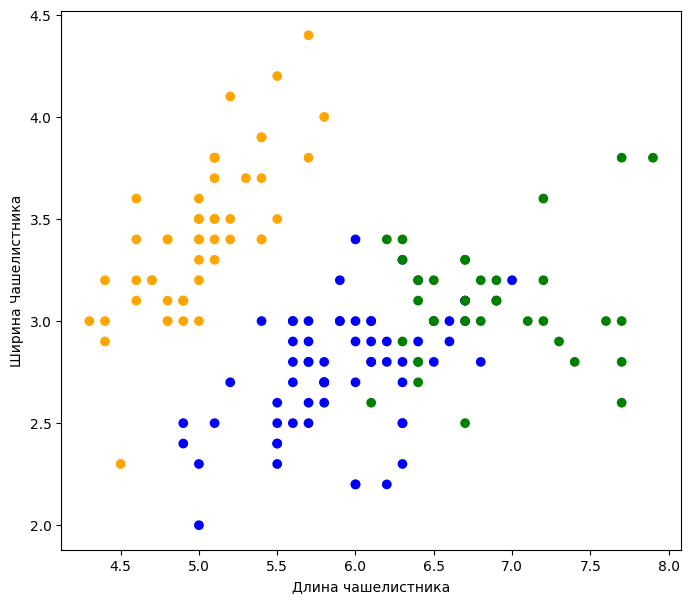

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Создание цветовой карты из списка цветов
my_colors = ["orange", "green", "blue"]
my_cmap = mcolors.ListedColormap(my_colors)
my_labels = ['Щетинистый', 'Разноцветный', 'Виргинский']

# загрузка датасета
X = iris.iloc[:, :4].values

# создание объекта SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors') # rbf

# кластеризация данных
labels = model.fit_predict(X)

# визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=my_cmap)
plt.xlabel('Длина чашелистника')
plt.ylabel('Ширина Чашелистника')
# class1_patch = mpatches.Patch(color=my_colors[0], label='Щетинистый')
# class2_patch = mpatches.Patch(color=my_colors[2], label='Разноцветный') # Разноцветный
# class3_patch = mpatches.Patch(color=my_colors[1], label='Виргинский')  # Виргинский

# создание легенды
# plt.legend(handles=[class1_patch, class2_patch, class3_patch], title='')
fig = plt.gcf()
fig.set_size_inches(8, 7)
plt.show()

#### Сравнение с родной кластеризацией [Тут](#source-iris-sepal)

 ### **OPTICS** (Ordering Points To Identify the Clustering Structure)

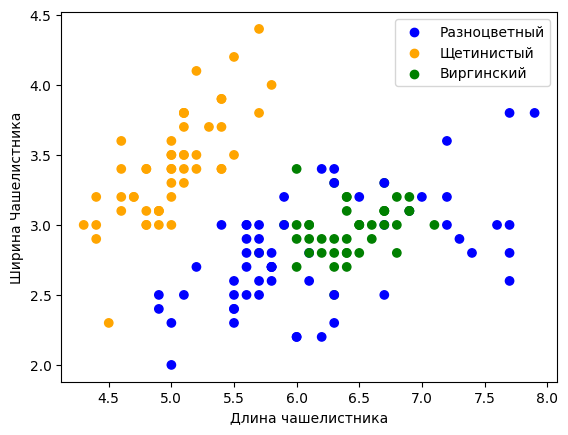

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Создание цветовой карты из списка цветов
my_colors = ["blue", "orange", "green"]
my_cmap = mcolors.ListedColormap(my_colors)
my_labels = ['Разноцветный', 'Щетинистый', 'Виргинский']  # Виргинский

# загрузка датасета
X = iris.iloc[:, :4].values

clustering = OPTICS(min_samples=15, xi=0.005)  # 14, 0.5

# min_samples - это минимальное количество точек, которые необходимы для образования кластера.

# xi - это параметр, который контролирует разделение кластеров.
# Значение xi более близкое к 0 приводит к более четкому разделению кластеров,
# в то время как значение xi более близкое к 1 может привести к объединению нескольких близко расположенных кластеров в один.

clustering.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap=my_cmap)
plt.xlabel('Длина чашелистника')
plt.ylabel('Ширина Чашелистника')
# Указываем метки и цвета для легенды
for i, label in enumerate(my_labels):
    plt.scatter([], [], c=my_colors[i], label=label)

plt.legend()
plt.show()

#### Получаются достаточно странные результаты. Не стоит забывать, что разные алгоритмы применяются в разных случаях, поэтому для нашего датасета этот метод применять не стоит

 ### **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise)

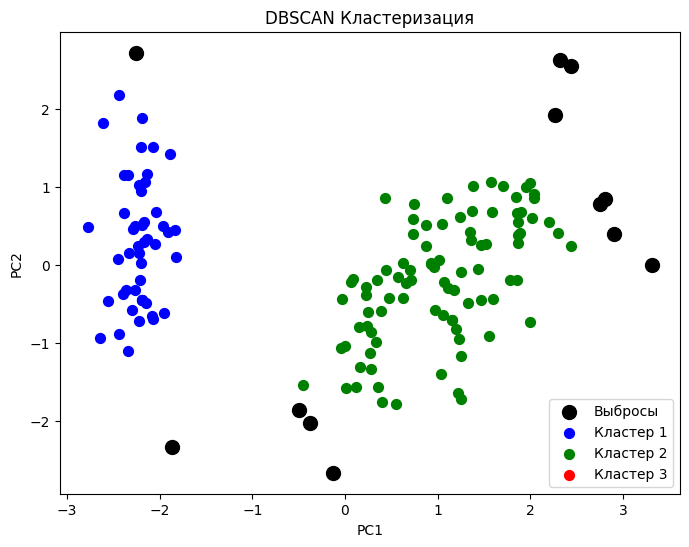

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

X = iris.iloc[:, :4].values

# Стандартизация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Уменьшение размерности до 2-х компонент с помощью метода главных компонент (PCA) для отрисовки графика на 2D плоскости
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)     # нет третьего кластера, потому что в DBSCAN-алгоритме для определения кластеров используются два параметра: eps и min_samples.
dbscan_labels = dbscan.fit_predict(X_pca)   # eps определяет радиус окрестности точек, которые рассматриваются в качестве соседей данной точки,
                                            # min_samples определяет минимальное количество соседей, которые должны находиться в этой окрестности для того, чтобы точка считалась основной.
# Визуализация результатов кластеризации
plt.figure(figsize=(8,6))
plt.scatter(X_pca[dbscan_labels==-1, 0], X_pca[dbscan_labels==-1, 1], s=100, c='k', marker='o', label='Выбросы')
plt.scatter(X_pca[dbscan_labels==0, 0], X_pca[dbscan_labels==0, 1], s=50, c='b', marker='o', label='Кластер 1')   # их так же называют "аномальными"
plt.scatter(X_pca[dbscan_labels==1, 0], X_pca[dbscan_labels==1, 1], s=50, c='g', marker='o', label='Кластер 2')
plt.scatter(X_pca[dbscan_labels==2, 0], X_pca[dbscan_labels==2, 1], s=50, c='r', marker='o', label='Кластер 3')
plt.title('DBSCAN Кластеризация')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Часто в данных встречаются так называемые "выбросы", которые нельзя отнести ни к одной группе

#### В этом методе наша модель сама определяет число кластеров, поэтому нашей 3-ей группы на графике нет.

    Стандартизация (в методе Standart Scaler) происходит путем вычитания среднего значения признака
    из каждого наблюдения и деления результата на стандартное отклонение признака.

    После этого данные будут иметь среднее значение близкое к 0, а стандратное отклонение к 1

$$z = \frac{x-\mu}{\sigma}$$


$$x-\mu: ИсходноеЗначение - Среднее$$

$$\sigma : Стандартное Отклонение$$

Помимо этого, на практике, при приминении статистических критериев, перед Z-преобразованием, может использоваться **Логарифмическое преобразование** для приведения данных к симметричному виду, чтобы они были относительно похожи на Гауссовское (Нормальное), такой подход возможен только при схожести данных на нормальное распределение, например, рост людей в целом по стране.

# Теперь рассмотрим методы **Оценки Качества**:

*    **Метод силуэта** (silhouette method) - этот метод использует коэффициент силуэта, который измеряет, насколько объект хорошо соответствует своему кластеру по сравнению с другими кластерами. Оптимальное число кластеров выбирается таким образом, чтобы коэффициент силуэта был максимальным.

        1. Для каждого объекта вычисляем:
                a(i) - среднее расстояние от объекта i до всех остальных объектов в том же кластере, что и i:
                b(i) - минимальное среднее расстояние от объекта i до объектов в других кластерах:


$$a_i = \frac{1}{|C_i|-1} \sum_{j\in C_i, i\neq j} d(i,j)$$

$$b_i = \min\limits_{k \neq i} \frac{1}{|C_k|} \sum\limits_{j \in C_k} d(i,j)$$

        2. Вычисляем коэффициент силуэта для каждого объекта i:
            s(i) = (b(i) - a(i)) / max(a(i), b(i))  

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

        3. Вычисляем средний коэффициент силуэта для всех объектов в кластере:  (N - количество объектов в кластере)

$$S = \frac{1}{N} \sum_{i=1}^{N} s(i)$$  

      4. Вычисляем средний коэффициент силуэта для всех объектов во всех кластерах: (K-количество кластеров)

$$S_{mean} = \frac{1}{K} \sum_{i=1}^{K} S_i$$


*    **Метод джекнайфа** (jackknife) - этот метод используется для оценки стабильности результата кластеризации. Он заключается в том, чтобы случайным образом удалять части данных и запускать кластеризацию на оставшихся данных. Затем оптимальное число кластеров выбирается на основе стабильности результата кластеризации при различных удалениях.

  1. Пусть у нас есть выборка $X$ размера $n$.

  2. Для каждого $i$ из $1, 2, ..., n$ создаем выборку $X^{(-i)}$, исключая $i$-й элемент из выборки $X$.

  3. Для каждой выборки $X^{(-i)}$ оцениваем параметр $\theta$.

  4. Вычисляем оценку параметра для исходной выборки $X$ как среднее значение оценок параметра для выборок $X^{(-i)}$:

  $$\hat{\theta}_{\mathrm{jack}} = \frac{1}{n} \sum_{i=1}^{n} \theta^{(-i)}$$

  5. Оценка дисперсии выборочной оценки $\hat{\theta}$ с помощью метода джекнайфа может быть получена по формуле:

  $$\operatorname{Var}_{\text{jack}}(\hat{\theta}) = \frac{n}{n-1}\sum_{i=1}^n \left(\hat{\theta}^{(-i)} - \hat{\theta}^\text{jack} \right)^2$$ где $\hat{\theta}_{(-i)}$ - оценка параметра $\theta$ для выборки $X^{(-i)}$)


  6. Для получения доверительного интервала для $\theta$ можно использовать стандартный подход с использованием статистической функции распределения, а затем применить метод джекнайфа для оценки дисперсии оценки параметра.

  7. Повторить шаги 2-6 для различных выборок $X$, чтобы получить усредненные оценки параметра и дисперсии оценки.

*   	**Метод подбора гиперпараметров**

Алгоритм работает на основе кросс-валидации и переборе параметров модели, принимая на вход какую-либо модель, например, KMeans, затем перебирает все комбинации параметров модели и выполняет кросс-валидацию для каждой из них. После этого выбирается оптимальная комбинация, в которой качество кросс-валидации наилучшее.


    Кросс-валидация (Cross-validation) - это метод оценки производительности модели.

    Когда модель обучается на тренировочных данных и тестируется на тестовых данных,
    возможно получить смещенную оценку производительности модели, особенно если размер выборки невелик.
    Кросс-валидация позволяет более точно оценить производительность модели, путем разбиения данных на несколько частей (фолдов),
    где каждая часть по очереди используется для тестирования модели, а оставшиеся части используются для ее обучения.

#### Давайте посмотрим на **Метод Силуэта** (silhouette method):

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2, 10):
  model = KMeans(n_clusters=i, random_state=42)         # Создаем модель KMeans
  model.fit(X_temp)                                     # Обучаем модель на данных
  print(silhouette_score(X_temp, model.labels_))        # Получаем коэффициент силуэта

0.6808136202936816
0.5525919445499757
0.4978256901095472
0.4885175508886279
0.36820569682713084
0.3576975600180635
0.35912838676456094
0.3423796791000656


#### Чем выше значение коэффициента, тем стабильнее результат

#### **Метод джекнайфа** (jackknife):

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import resample

model = KMeans(n_clusters=3, random_state=42)
n_iterations = 100      # Задаем число итераций
scores = []             # Задаем список для сохранения результатов

for i in range(n_iterations):
    X_sample = resample(X_temp, replace=False)                # Удаляем случайную часть данных
    model.fit(X_sample)                                       # Обучаем модель на оставшихся данных
    scores.append(silhouette_score(X_sample, model.labels_))  # Сохраняем результат

np.std(scores)        # Получаем стабильность результатов

4.2998752849492583e-17

#### Как и в Методе Силуэта, чем выше - тем лучше. Для наглядности посмотрим, как алгоритм работает для 2 кластеров:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import resample

model = KMeans(n_clusters=2, random_state=42)
n_iterations = 100
scores = []
for i in range(n_iterations):
    X_sample = resample(X_temp, replace=False)
    model.fit(X_sample)
    scores.append(silhouette_score(X_sample, model.labels_))

np.std(scores)

1.9261649578547448e-16

#### Стабильность в этом случае выше, т.к.деление на 2 группы явно можно проследить на графике:

<Figure size 900x500 with 0 Axes>

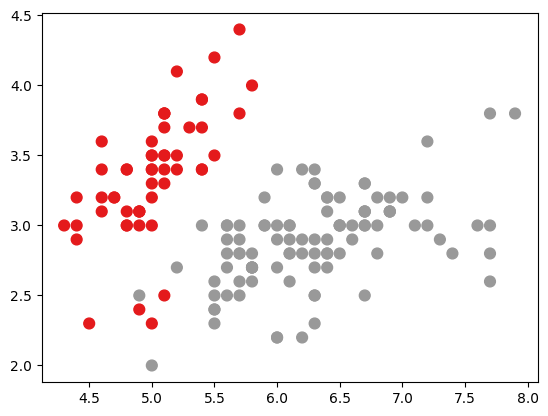

<Figure size 900x500 with 0 Axes>

In [ ]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_temp)
plt.scatter(X_temp[:, 0], X_temp[:, 1], cmap='Set1', c=clusters, s=60)
plt.figure(figsize=(9, 5))

#### **Метод подбора гиперпараметров** для определения числа кластеров (Машинное обучение)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

model = KMeans(random_state=42)

param_grid = {'n_clusters': range(2, 7)}            # Задаем диапазон числа кластеров для перебора
grid_search = GridSearchCV(model, param_grid, cv=5) # Инициализируем GridSearchCV для перебора параметров
grid_search.fit(X_temp)                             # Выполняем поиск оптимального числа кластеров

optimal_n_clusters = grid_search.best_params_['n_clusters']   # Получаем оптимальное число кластеров и соответствующую модель KMeans
optimal_model = grid_search.best_estimator_

print(f"Оптимальное число кластеров: {optimal_n_clusters}")

Оптимальное число кластеров: 6


    Функция GridSearchCV выполняет перебор параметров модели с помощью
    кросс-валидации. Она принимает в качестве аргументов модель (например, KMeans),
    словарь параметров модели и количество "фолдов" для кросс-валидации. Затем
    она перебирает все комбинации параметров модели и выполняет кросс-валидацию
    для каждой комбинации. После этого функция возвращает оптимальную комбинацию
    параметров модели, которая обеспечивает наилучшее качество на кросс-валидации.

    Параметр "cv" в функции GridSearchCV определяет количество "фолдов" (или разбиений) для выполнения кросс-валидации.
    Кросс-валидация - процесс проверки качества модели на нескольких независимых обучающих и тестовых
    наборах данных. Для каждого разбиения модель обучается на одном наборе данных
    и проверяется на другом наборе данных. Результаты всех разбиений суммируются,
    чтобы получить общую оценку качества модели.

Подбирает 6 кластеров, что, на самом деле, не соотвествует действительности, но ради наглядности можно посмотреть график с разбиением на 6 групп:

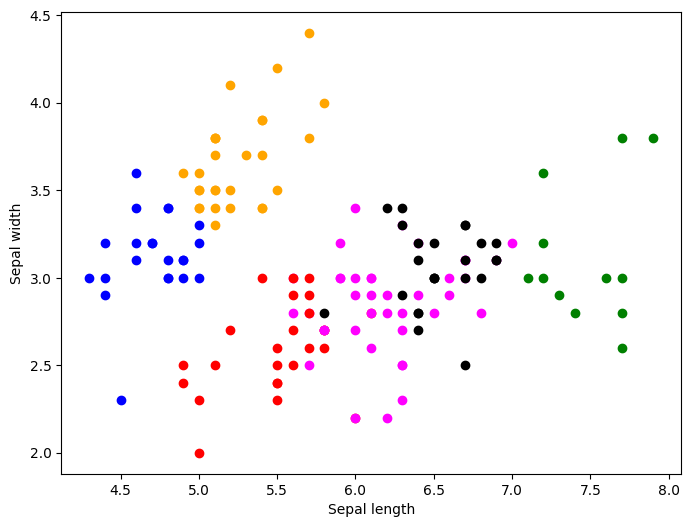

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Выделение признаков и целевой переменной
X = load_iris().data
y = load_iris().target

# Инициализация модели KMeans с оптимальным числом кластеров
model = KMeans(n_clusters=6, random_state=42)

# Обучение модели на данных
model.fit(X)

# Получение меток кластеров
labels = model.labels_

# Построение графика
colors = ['green', 'blue', 'red', 'magenta', 'black', 'orange']

plt.figure(figsize=(8, 6))
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[labels[i]])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# **Классификация**

Машинное обучение - можно использовать алгоритмы машинного обучения, такие как метод опорных векторов (support vector machines, SVM), случайный лес (random forest), или нейронные сети, для определения оптимального числа кластеров. Например, можно использовать кросс-валидацию для определения оптимального числа кластеров при обучении модели на части данных и проверки ее на другой части.

*	**Случайный лес** (random forest):

	      Выбирается случайное подмножество данных для обучения (случайное множество признаков и случайное множество объектов).

	      Строится дерево решений на основе случайного подмножества данных.
          Дерево строится до максимальной глубины или пока не будет достигнуто заданное условие остановки.

	      Процесс повторяется, пока не будет создано достаточное количество деревьев (определяется заранее).

	      Для классификации объекта нового наблюдения модель использует каждое дерево, чтобы получить прогноз,
          и затем выбирает наиболее часто встречающийся класс (для задач классификации) или среднее значение (для задач регрессии) среди всех деревьев.

        Метод случайного леса имеет ряд преимуществ перед другими алгоритмами машинного обучения: устойчивость к выбросам, возможность работать с большими объемами данных и высокая точность прогнозирования.


* **Метод опорных векторов** (support vector machines, SVM):

Для начала опишем, как этот алгоритм работает при разделении на 2 группы:

	Работает по принципу поиска оптимальной гиперплоскости, которая разделяет два класса объектов.

	Для построения гиперплоскости SVM использует вектора-опорные точки,
    которые лежат на границе разделения двух классов. Эти точки определяют гиперплоскость,
    которая максимально удалена от обоих классов и называется максимальной разделяющей гиперплоскостью.

	В случае, когда данные не являются линейно разделимыми, SVM использует ядерную технику,
    которая позволяет перевести данные в пространство более высокой размерности, где они становятся линейно разделимыми.
    
    Таким образом, SVM может работать с широким спектром типов данных и обеспечивает хорошую обобщающую способность.

Кроме того, SVM имеет ряд гиперпараметров, которые можно настроить для достижения лучших результатов, в том числе параметр регуляризации, тип ядра (линейное, полиномиальное, радиальное и др.) и его параметры (например, коэффициент полиномиального ядра). Оптимальные значения этих параметров могут быть найдены с помощью методов кросс-валидации и оптимизации гиперпараметров.


В случае же, когда нужно определить 3 и более класса:
1.	Существует два подхода для решения такой задачи. Один из них − метод **один против всех** (one-vs-all), который заключается в том, что для каждого класса строится отдельный классификатор, который разделяет этот класс с оставшимися. В итоге получается несколько гиперплоскостей, каждая из которых разделяет один класс от всех остальных.


2.	Другой подход - метод **один против другого** (one-vs-one), где для каждой пары классов строится отдельный классификатор, который разделяет один класс от другого. В итоге получается:

$\frac{N \cdot (N-1)}{2}$  гиперплоскостей, где N - число классов.

В обоих подходах для классификации новых объектов применяются все построенные классификаторы, и объект относится к тому классу, для которого больше всего классификаторов дали положительный ответ.

## **Метод случайного леса** и **Кривая обучения**

Для начала создадим изначальное разбиение Species, но в виде кластеров (чисел)

In [ ]:
import pandas as pd

# создаем словарь с соответствиями меток кластеров и значений species
cluster_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# создаем столбец cluster на основе species
iris['cluster'] = iris_source['Species'].map(cluster_map)

iris['cluster'].unique()

array([0, 1, 2])

##### Посмотрим аккуратность обучения

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.colors as mcolors

X, y = iris.iloc[:, :4].values, iris['cluster'].to_numpy()

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация классификатора Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на тренировочных данных
rf.fit(X_test, y_test)

# Предсказание на тестовых данных
y_pred = rf.predict(X_test)

# Оценка точности предсказаний
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


#### Модель переобучена, погрешности в данных нет, поэтому нужны "новые"

#### Используем Bootstrap для генерации новых данных на основе исходных и снова обучим модель

* Bootstrap - метод, который используется для оценки параметров модели и проверки ее качества путем генерации выборок из исходных данных. Он заключается в том, чтобы множество выборок, которые были получены путем выбора элементов из исходной выборки с повторением, для анализа свойств модели и ее ошибок на каждой из этих выборок.

#### Более формально, Bootstrap использует следующие шаги:

    1) Создание множества выборок путем выбора элементов из исходной выборки с повторением.
    (Размер каждой выборки совпадает с размером исходной выборки)
    2) На каждой выборке модель обучается и ее качество оценивается.
    3) Полученные оценки модели для каждой выборки объединяются в единую оценку путем усреднения или других методов комбинирования.

* Bootstrap позволяет избежать проблемы переобучения, так как каждая выборка является случайной и похожа на остальные выборки. Кроме того, Bootstrap уменьшает возможность выбросов и позволяет увидеть более широкий спектр результатов, чем обычный анализ на основе одной выборки.

In [ ]:
from sklearn.utils import resample

np.random.seed(42)

# Создадим bootstrap выборку
X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=len(X_train) * 50, random_state=42)

y_bootstrap_pred = rf.predict(X_bootstrap)

# Оценка точности предсказаний на bootstrap выборке
bootstrap_accuracy = accuracy_score(y_bootstrap, y_bootstrap_pred)
print(f"Accuracy on bootstrap set: {bootstrap_accuracy:.2f}")

Accuracy on bootstrap set: 0.95


Теперь погрешность появилась, она равна 5%




### Для сравнения можно построить графики для моделей (где точность равна 1 и 0.95), а затем сравнить их:

Модель с точность 1:

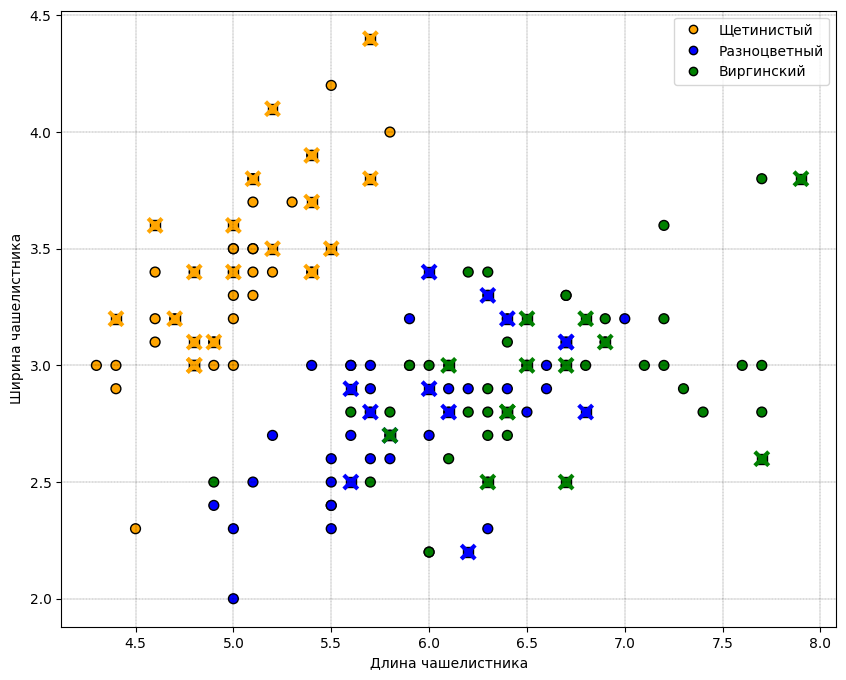

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# Создание цветовой карты из списка цветов
my_colors = ["orange", "blue", "green"]
my_cmap = mcolors.ListedColormap(my_colors)
my_labels = ['Щетинистый', 'Разноцветный', 'Виргинский']

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=my_cmap, s=50, edgecolors='k')           # обучающая выборка
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=my_cmap, s=50, marker='s', edgecolors='k')  # тестовая выборка
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=my_cmap, s=100, marker='x', linewidths=3, edgecolors='k')  # предсказанные значения (крестики)
plt.xlabel('Длина чашелистника')
plt.ylabel('Ширина чашелистника')
plt.grid(True, linestyle='--', color='black', linewidth='0.2', zorder=5)
# указываем метки для каждого цвета из my_cmap
handles = [plt.plot([], [], marker="o", ls="", color=color, markeredgecolor="k")[0] for color in my_colors]
plt.legend(handles, my_labels, loc='upper right')

plt.show()

###### Модель с точность 0.95:

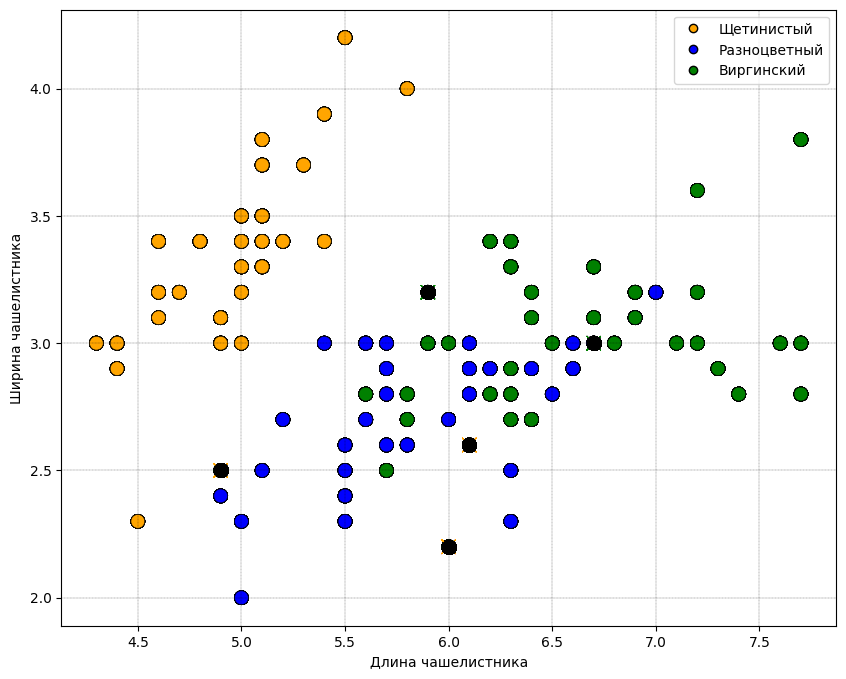

In [ ]:
import matplotlib.colors as mcolors

# Создание цветовой карты из списка цветов
my_colors = ["orange", "blue", "green"]
my_cmap = mcolors.ListedColormap(my_colors)
my_labels = ['Щетинистый', 'Разноцветный', 'Виргинский']

# Определение ошибочных данных
incorrect_mask = y_bootstrap != y_bootstrap_pred

# Создание графика
plt.figure(figsize=(10, 8))
plt.scatter(X_bootstrap[:, 0], X_bootstrap[:, 1], c=y_bootstrap, cmap=my_cmap, s=100, linewidths=0.5, edgecolors='k', marker='o')
plt.scatter(X_bootstrap[incorrect_mask, 0], X_bootstrap[incorrect_mask, 1], c=y_bootstrap_pred[incorrect_mask], cmap=my_cmap, s=100, linewidths=0.5, edgecolors='k', marker='x')
plt.scatter(X_bootstrap[incorrect_mask, 0], X_bootstrap[incorrect_mask, 1], c='black', s=100, linewidths=0.5, edgecolors='k', marker='o')  # Ошибочные данные черным цветом
plt.xlabel('Длина чашелистника')
plt.ylabel('Ширина чашелистника')
plt.grid(True, linestyle='--', color='black', linewidth='0.2', zorder=5)
# указываем метки для каждого цвета из my_cmap
handles = [plt.plot([], [], marker="o", ls="", color=color, markeredgecolor="k")[0] for color in my_colors]
plt.legend(handles, my_labels, loc='upper right')

plt.show()

Можно увидеть небольшие несоотвествия между данными

##### Посмотрим важности признаков

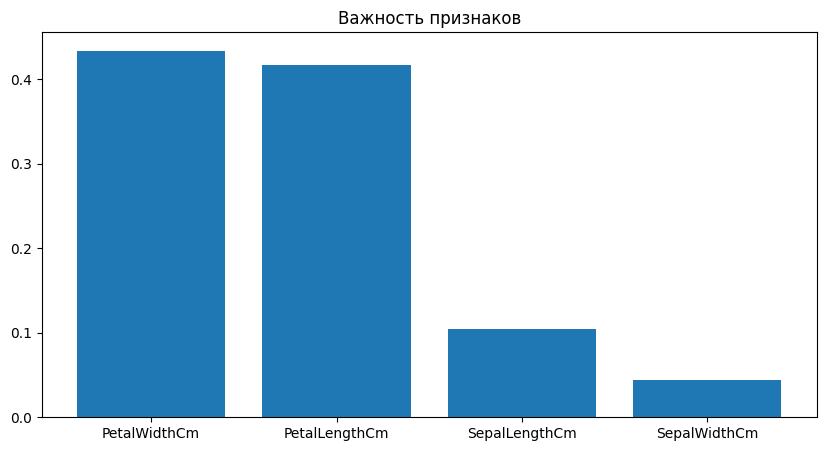

In [ ]:
# Получение важности признаков из модели случайного леса
importances = rf.feature_importances_

# Сопоставление признаков и их важности
features = iris.columns[:4].tolist()
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# Построение диаграммы важности признаков
plt.figure(figsize=(10, 5))
plt.title("Важность признаков")
plt.bar(sorted_features, sorted_importances)
plt.show()

##### Как можно увидеть, наиболее важные признаки имеют длина/ширина лепестков при классификации - это можно было проследить на графике [Вот тут](#source-iris-petal) (в сумме они все дают 1, т.к. это доли)

#### Кривая обучения (в зависимости от объёма обучающей выборки)

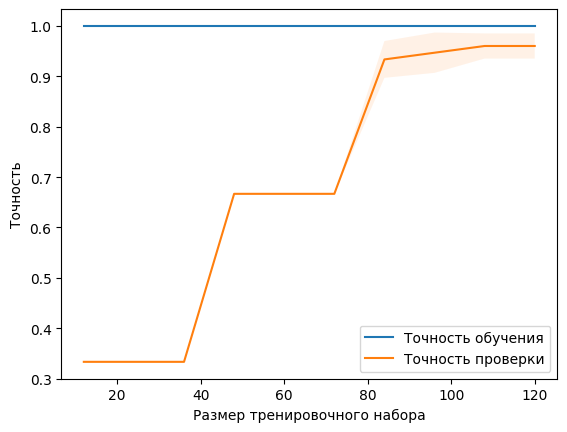

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# загрузка данных
X, y = iris.iloc[:, :4].values, iris['cluster'].to_numpy()

# число деревьев в лесу
model = RandomForestClassifier(n_estimators=100)

# задание значений размеров обучающей выборки
train_sizes = np.linspace(0.1, 1.0, 10)

# построение кривой обучения
train_sizes, train_scores, test_scores = learning_curve(
    # train_sizes: размеры обучающей выборки, на которых было измерено качество
    # train_scores: точности обучения для каждого размера обучающей выборки
    # test_scores: точности проверки для каждого размера обучающей выборки
    model, X, y, cv=5, train_sizes=train_sizes, scoring='accuracy')

# вычисление средних значений и стандартных отклонений для кривой обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# построение графика кривой обучения
plt.plot(train_sizes, train_mean, label='Точность обучения')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Точность проверки')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Точность')
plt.legend()
plt.show()

## **Метод опорных векторов (SVM)** и **Кривая обучения**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample

X, y = iris.iloc[:, :4].values, iris['cluster'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=len(X_train) * 100, random_state=42)

# Обучение SVM на данных
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_bootstrap, y_bootstrap)

# Предсказание на bootstrap выборке
y_bootstrap_pred = clf.predict(X_bootstrap)

# Оценка точности предсказаний на bootstrap выборке
bootstrap_accuracy = accuracy_score(y_bootstrap, y_bootstrap_pred)
print(f"Accuracy on bootstrap set: {bootstrap_accuracy:.2f}")

# Предсказание на тестовых данных
y_pred = clf.predict(X_test)

# Оценка точности предсказаний на тестовой выборке
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {test_accuracy:.2f}")

Accuracy on bootstrap set: 0.97
Accuracy on test set: 1.00


#### Как и в методе **Случайного леса**, погрешность при исходных данных составляет 0%, а при bootstrap - 3%

Посторим график для модели с погрешностью в 3%:

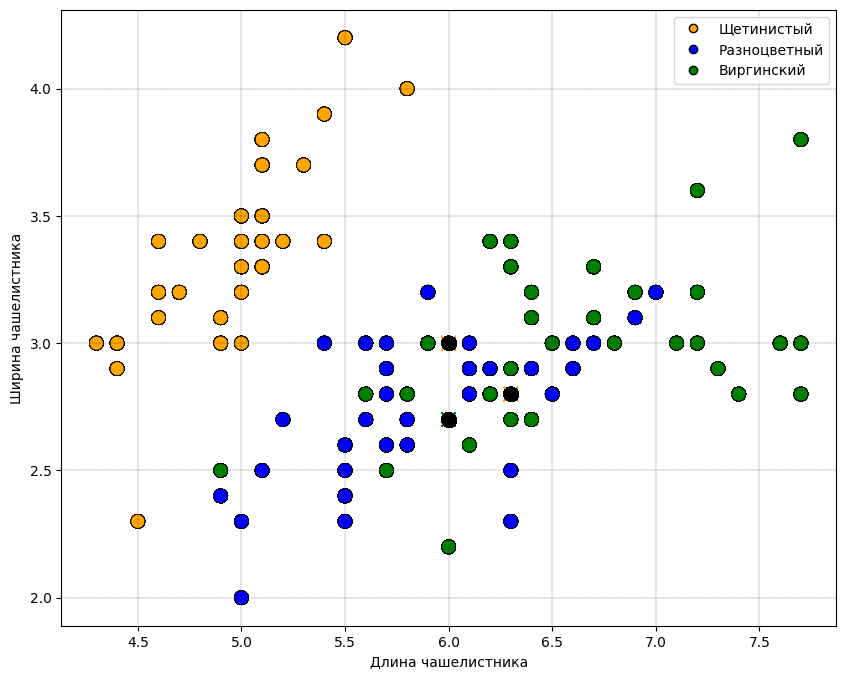

In [ ]:
import matplotlib.colors as mcolors

# Создание цветовой карты из списка цветов
my_colors = ["orange", "blue", "green"]
my_cmap = mcolors.ListedColormap(my_colors)
my_labels = ['Щетинистый', 'Разноцветный', 'Виргинский']

# Определение ошибочных данных
incorrect_mask = y_bootstrap != y_bootstrap_pred

# Создание графика
plt.figure(figsize=(10, 8))
plt.scatter(X_bootstrap[:, 0], X_bootstrap[:, 1], c=y_bootstrap, cmap=my_cmap, s=100, linewidths=0.5, edgecolors='k', marker='o')
plt.scatter(X_bootstrap[incorrect_mask, 0], X_bootstrap[incorrect_mask, 1], c=y_bootstrap_pred[incorrect_mask], cmap=my_cmap, s=100, linewidths=0.5, edgecolors='k', marker='x')
plt.scatter(X_bootstrap[incorrect_mask, 0], X_bootstrap[incorrect_mask, 1], c='black', s=100, linewidths=0.5, edgecolors='k', marker='o')  # Ошибочные данные черным цветом
plt.xlabel('Длина чашелистника')
plt.ylabel('Ширина чашелистника')
plt.grid(True, linestyle='--', color='black', linewidth='0.2', zorder=5)
# указываем метки для каждого цвета из my_cmap
handles = [plt.plot([], [], marker="o", ls="", color=color, markeredgecolor="k")[0] for color in my_colors]
plt.legend(handles, my_labels, loc='upper right')

plt.show()

#### График делать для модели с точностью 100% не имеет смысла, ничего нового мы там не увидим, посмотрим на кривую обучения:

### Теперь постоим кривую обучения для этого метода

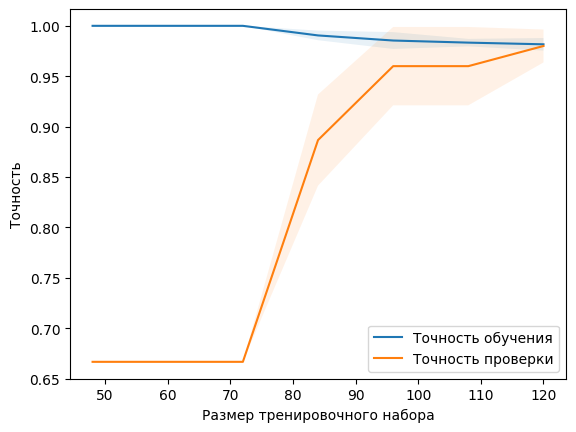

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# загрузка данных
X, y = iris.iloc[:, :4].values, iris['cluster'].to_numpy()

# определение модели
model = SVC(kernel='linear', C=1)

# задание значений размеров обучающей выборки
train_sizes = np.linspace(0.1, 1.0, 10)

# построение кривой обучения
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=train_sizes, scoring='accuracy')

# вычисление средних значений и стандартных отклонений для кривой обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# построение графика кривой обучения
plt.plot(train_sizes, train_mean, label='Точность обучения')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Точность проверки')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Исследование датасета Iris было выполнено с использованием нескольких методов кластеризации и классификации, таких как:

Кластеризация:
 * KMeans
 * DBSCAN
 * Spectral Clustering
 * OPTICS

Классификация:
  * метод Jackknife'а
  * метод Силуэта
  * алгоритмы машинного обучения:
      * метод Подбора Гиперпараметров (hyperparameter tuning)
      * Случайный Лес (Random Forest)
      * метод Опорных векторов (SVM)


Результаты кластеризации для методов KMeans и Spectral Clustering показали, что Iris разделяется на три основных кластера, соответствующие трем видам цветков: Setosa, Versicolor и Virginica. Результаты DBSCAN и OPTICS, что не подходят для нашего датасета.

Кластерный анализ позволяет выделить 3 кластера объектов ирисов на основе их четырех признаков: длины и ширины чашелистика и лепестка. Визуализация кластеров на графике показывает, что объекты ирисов Setosa образуют один кластер, а объекты ирисов Versicolor и Virginica образуют два других кластера.

Методы машинного обучения для датасета Iris показали хорошие результаты, аккуратность подбора параметров при исходных данных и размером обучающей выборки в 0.3 и 0.7 тренировочного набора, позволяют получать значения с нулевой погрешностью, а при Bootstrap, для генерации выборок, погрешность составляет в районе 3-5%.

В целом, кластеризация датасета Iris является относительно простой задачей, которая может быть успешно решена различными методами кластеризации. Однако, для более сложных задач кластеризации, возможно, потребуются более сложные методы и подходы, применения других алгоритмов для получения нужного результата.